# Exercícios

## 1. Qual a média do preço de compra dos imóveis por “Nível”? 
- Nível 0 -> Preço entre 0 e 321.950
- Nível 1 -> Preço entre 321.950 e 450.000
- Nível 2 -> Preço entre 450.000 e 645.000
- Nível 3 -> Acima de 645.000

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [44]:
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Resolução utilizando a estrutura condicional

In [4]:
data['level_price'] = 'NaN'
for i in range(len(data)):
    if data['price'][i] <= 321950:
        data['level_price'][i] = 0
    elif 321950 < data['price'][i] <= 450000:
        data['level_price'][i] = 1
    elif 450000 < data['price'][i] <= 645000:
        data['level_price'][i] = 2
    else:
        data['level_price'][i] = 3

/tmp/ipykernel_9055/2572044692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level_price'][i] = 0
/tmp/ipykernel_9055/2572044692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level_price'][i] = 2
/tmp/ipykernel_9055/2572044692.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level_price'][i] = 3
/tmp/ipykernel_9055/2572044692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Resolução utilizando a função apply e lambda

In [45]:
data['level'] = data['price'].apply(lambda x: 0 if x <= 321950 else
                                     1 if 321950 < x <= 450000 else
                                     2 if 450000 < x <= 645000 else
                                     3)

In [51]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,level
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


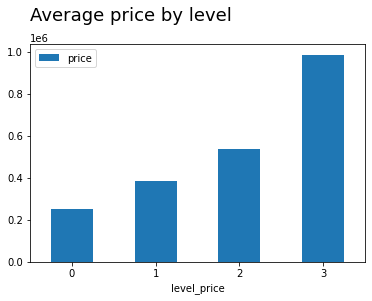

In [6]:
data[['price', 'level_price']].groupby('level_price').mean().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Average price by level', loc='left', fontsize=18, y=1.08)
plt.show()

## 2. Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427 sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e 2550 sqft
- Size 3 -> Tamanho acima de 2550 sqft

In [7]:
data['sqft_living_level'] = 'NaN'
for i in range(len(data)):
    if data['sqft_living'][i] <= 1427:
        data['sqft_living_level'][i] = 0
    elif 1427 < data['sqft_living'][i] <= 1910:
        data['sqft_living_level'][i] = 1
    elif 1910 < data['sqft_living'][i] <= 2550:
        data['sqft_living_level'][i] = 2
    else:
        data['sqft_living_level'][i] = 3

/tmp/ipykernel_9055/3612299397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_living_level'][i] = 0
/tmp/ipykernel_9055/3612299397.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_living_level'][i] = 3
/tmp/ipykernel_9055/3612299397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_living_level'][i] = 2
/tmp/ipykernel_9055/3612299397.py:6: SettingWithCopyWarning: 
A value is trying to be set 

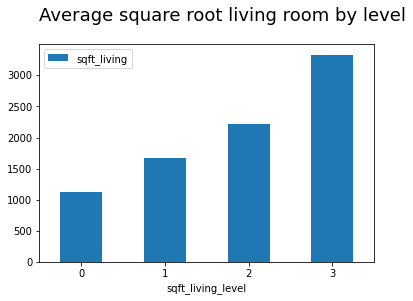

In [8]:
data[['sqft_living', 'sqft_living_level']].groupby('sqft_living_level').mean().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Average square root living room by level', loc='left', fontsize=18, y=1.08)
plt.show()

## 3. Adicione as seguinte informações ao conjunto de dados original:
- Place ID: Identificação da localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País

In [9]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
from geopy.geocoders import Nominatim

In [5]:
geolocator = Nominatim(user_agent='marcos')

In [30]:
data_sample = data.sample(20)
data_sample['place_id'] = 'Nan'
data_sample['osm_type'] = 'Nan'
data_sample['country'] = 'Nan'
data_sample['country_code'] = 'Nan'

for i in range(len(data_sample)):
    # Raw query lat and long
    query_lat_long = str(data_sample['lat'].iloc[i]) + ',' + str(data_sample['long'].iloc[i]) 
    
    # API geolocator request
    response = geolocator.reverse(query_lat_long)
    
    # Columns atribution
    if 'place_id' in response.raw:
        data_sample['place_id'].iloc[i] = response.raw['place_id']
    if 'osm_type' in response.raw:
        data_sample['osm_type'].iloc[i] = response.raw['osm_type']
    if 'country' in response.raw['address']:
        data_sample['country'].iloc[i] = response.raw['address']['country']
    if 'country_code' in response.raw['address']:
        data_sample['country_code'].iloc[i] = response.raw['address']['country_code']

/home/mg/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
data_sample.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,place_id,osm_type,country,country_code
8395,4319200620,20141015T000000,235000.0,2,1.00,1270,9182,1.5,0,0,...,0,98126,47.5365,-122.378,1760,9100,144994164,way,United States,us
1941,2600010070,20150414T000000,998000.0,3,2.25,3370,11757,2.0,0,2,...,0,98006,47.5573,-122.160,2690,10500,296039320,way,United States,us
14463,5700003705,20140619T000000,930000.0,5,2.00,3530,9385,1.5,0,0,...,0,98144,47.5774,-122.285,4100,9203,147613128,way,United States,us
6782,8011100005,20150127T000000,398500.0,4,2.50,2250,6064,2.0,0,0,...,0,98056,47.4956,-122.174,1520,7840,221354297,way,United States,us
978,421049116,20150121T000000,216000.0,3,1.00,1280,8712,1.0,0,0,...,0,98003,47.3298,-122.297,1420,8800,220846648,way,United States,us


## 4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.

In [35]:
import ipywidgets as widgets
from matplotlib import gridspec

In [38]:
widgets.SelectionSlider(data['sqft_living'])

TraitError: options must be nonempty

In [40]:
test = widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

In [41]:
test

SelectionSlider(continuous_update=False, description='I like my eggs ...', index=1, options=('scrambled', 'sun…

## 5. Adicione os seguinte filtros no Dashboard:
- Filtro por data disponível para compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água ou não.